In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Definitions of MAE, MSE, RMSE

In [ ]:
def mae(data, ref):
    mae = 0
    c = 0
    for i in data:
      mae += abs(i-ref)
      c += 1
    return mae / c
    
def mse(data, ref):
    mse = 0
    c = 0
    for i in data:
      mse += (i-ref)**2
      c += 1
    return mse / c

def rmse(data, ref):
    return (mse(data, ref))**(1/2)

## Create random sample data

In [ ]:
num_sets = 1000
num_points = 1000

# Generates x sets with y data points each
data = np.random.normal(100, 20, (num_sets, num_points))

## Helper function for creating noisy data and plotting the charts

In [ ]:
def evaluate_metrics(data, num_outliers, amplitude_outliers):
    
    # Sample random "num_ouliers" points for each set
    noise = np.random.uniform(0, num_points, (num_sets, num_outliers))
    
    # Lists to keep the metrics for all original sets
    mae_original = []
    mse_original = []
    rmse_original = []
    # Lists to keep the metrics for all noisy sets
    mae_noisy = []
    mse_noisy = []
    rmse_noisy = []
    
    # For each observation set, evaluates all three distances to the mean of the set
    for i in range(data.shape[0]):
        # Recovers the observations
        observations = data[i]
        # Create a noisy verion of the data with the randomly-chosen outliers
        outliers = [int(i) for i in noise[i]]
        observations_noisy = []
        c  = 0
        for x in observations:
            if c in outliers:
                observations_noisy.append(x * amplitude_outliers)
            else:
                observations_noisy.append(x)
            c += 1
            
        # Calculates the mean value of the set.
        # It is important to use the mean of the original set in both cases, to prevent it from shifting and altering the result.
        set_mean = np.mean(observations)
        
        # Evaluate the metrics
        mae_original.append(mae(observations, set_mean))
        mse_original.append(mse(observations, set_mean))
        rmse_original.append(rmse(observations, set_mean))
        mae_noisy.append(mae(observations_noisy, set_mean))
        mse_noisy.append(mse(observations_noisy, set_mean))
        rmse_noisy.append(rmse(observations_noisy, set_mean))
        
    # Plots all
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    sns.histplot(mae_original, ax = ax1, color = 'maroon', kde = True, fill = False)
    sns.histplot(mae_noisy, ax = ax1, color = 'r', kde = True)
    sns.histplot(rmse_original, ax = ax2, color = 'darkgreen', kde = True, fill = False)
    sns.histplot(rmse_noisy, ax = ax2, color = 'g', kde = True)
    sns.histplot(mse_original, ax = ax3, color = 'darkblue', kde = True, fill = False)
    sns.histplot(mse_noisy, ax = ax3, color = 'b', kde = True)
    ax1.legend(["Original", "Noisy"], loc = 'lower right')
    ax2.legend(["Original", "Noisy"], loc = 'lower right')
    ax3.legend(["Original", "Noisy"], loc = 'lower right')
    ax1.set_title("MAE")
    ax2.set_title("RMSE")
    ax3.set_title("MSE")
    plt.tight_layout()

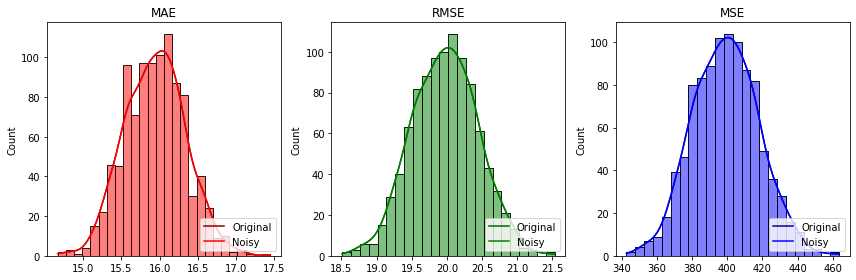

In [ ]:
evaluate_metrics(data, num_outliers=0, amplitude_outliers=1)

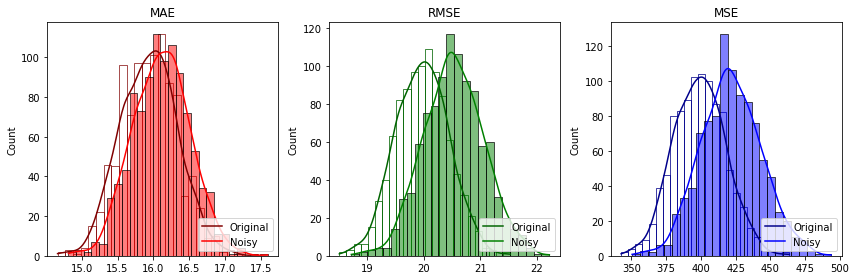

In [ ]:
evaluate_metrics(data, num_outliers=2, amplitude_outliers=2)

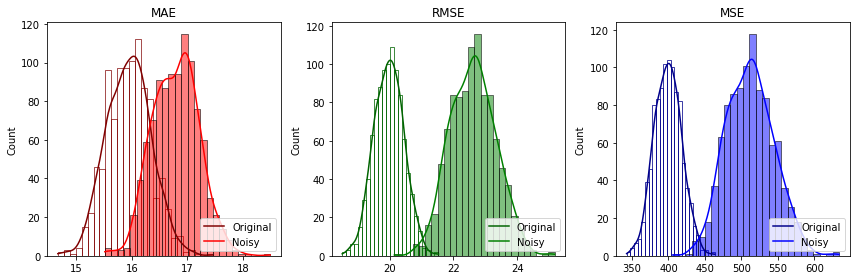

In [ ]:
evaluate_metrics(data, num_outliers=10, amplitude_outliers=2)

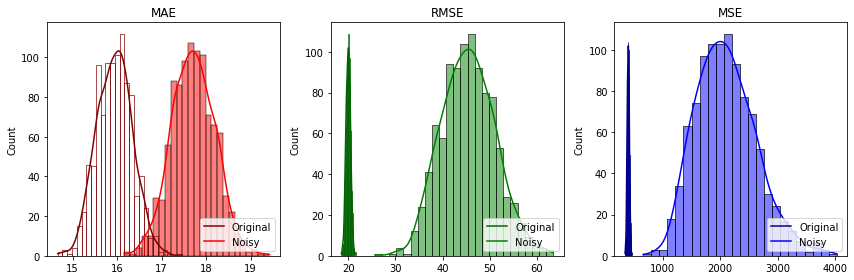

In [ ]:
evaluate_metrics(data, num_outliers=2, amplitude_outliers=10)